In [4]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

# Kmeans Clustering

In [5]:
# READ DATASET
df = pd.read_csv('./dataset/kendaraan_train_clean.csv')
df.sample(8)


,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
36172,1.472022,1.516975,-1.912163,1.025566
159000,-1.102929,0.123421,0.226793,-1.093719
55493,-0.178588,-1.812070,-1.552515,-0.615961
265056,0.679729,1.671814,-1.628230,-1.669479
138781,1.472022,-0.263677,0.813586,0.082301
81647,0.679729,0.123421,0.226793,0.000000
256476,2.000216,-1.424972,-1.628230,0.462057
59716,-0.838831,-0.418517,0.756800,-0.064702


## Memilih 2 kolom dengan nilai korelasi tertinggi

In [6]:
SELECTED_COLUMN=["Kanal_Penjualan", "Umur"]
df_clean = df[SELECTED_COLUMN]
df_clean.head()

,Kanal_Penjualan,Umur
0,0.756800,-0.574734
1,-1.571444,0.613705
2,0.908230,-1.168953
3,0.226793,1.273948
4,-0.454644,0.745754


## Membuat fungsi kmeans

In [7]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    # inisiasi centroid
    centroid = initCentroid(k, df)
    sum_wcss = 0
    print("="*40)
    print("INIT CENTROID")
    # menampilkan nilai cluster ke i
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")
    # membuat duplikat nilai centroid sekarang
    temp_centroid = centroid.copy()
    for i in range(max_iter):
        # membuat cluster baru
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            # mencari nilai centroid terdekat
            # dengan metode euclidean
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        sum_wcss = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        # menampilkan nilai per klaster
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")
        # berhenti jika nilai centroid sebelumnya sama dengan sekarang
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster, sum_wcss

## Membuat konstanta nilai K dan maksimum iterasi

In [8]:
NUM_K = 3
MAX_ITER = 100

## Menjalankan clustering

In [9]:
data = df_clean.to_numpy()
centroid, cluster, _ = kmeans(NUM_K, MAX_ITER, data)

INIT CENTROID
Klaster 1: [ 0.22679287 -0.11256315]
Klaster 2: [-1.6282305  -1.10292857]
Klaster 3: [-1.6282305   1.00985098]
ITERASI KE-1
Klaster 1: [ 0.57666235 -0.34114856]
Klaster 2: [-1.64773214 -0.44228203]
Klaster 3: [-1.47201725  1.12228593]
ITERASI KE-2
Klaster 1: [ 0.59289222 -0.4285623 ]
Klaster 2: [-1.64478922 -0.15498437]
Klaster 3: [-1.21281254  1.35466481]
ITERASI KE-3
Klaster 1: [ 0.60357573 -0.48949856]
Klaster 2: [-1.64372755  0.07019918]
Klaster 3: [-0.94542959  1.52257912]
ITERASI KE-4
Klaster 1: [ 0.60956906 -0.52714692]
Klaster 2: [-1.64182571  0.23671443]
Klaster 3: [-0.70032408  1.61872239]
ITERASI KE-5
Klaster 1: [ 0.61559747 -0.5582215 ]
Klaster 2: [-1.64224416  0.3462713 ]
Klaster 3: [-0.49523575  1.62356654]
ITERASI KE-6
Klaster 1: [ 0.61947701 -0.58094326]
Klaster 2: [-1.64316726  0.44018732]
Klaster 3: [-0.31640656  1.59522986]
ITERASI KE-7
Klaster 1: [ 0.62763684 -0.61374169]
Klaster 2: [-1.6444704   0.52870875]
Klaster 3: [-0.1321126   1.49530115]
ITERASI

## Menyimpan hasil clustering ke dataframe baru

In [10]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']

## Melakukan visualisasi clustering

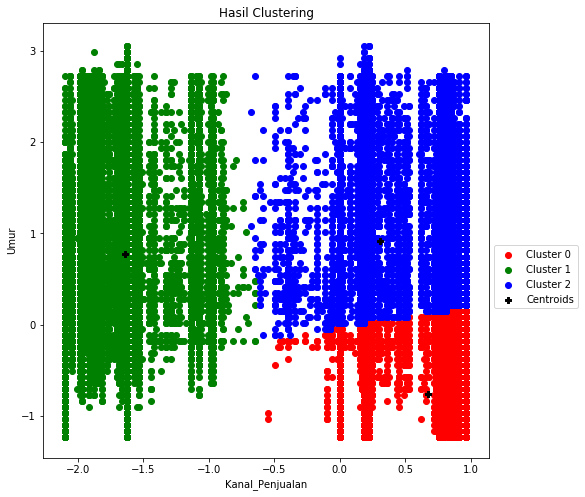

In [11]:
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(NUM_K):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

## Evaluasi nilai K dengan Elbow

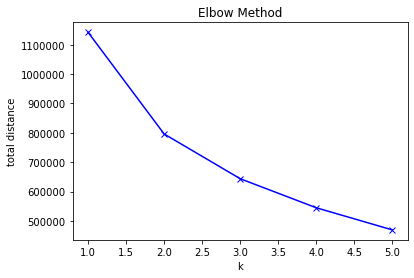

In [12]:
distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

INIT CENTROID
Klaster 1: [ 0.22679287 -0.17858751]
ITERASI KE-1
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
ITERASI KE-2
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
BERHENTI PADA ITERASI KE 2
INIT CENTROID
Klaster 1: [0.22679287 1.67009459]
Klaster 2: [ 0.75679954 -1.16895293]
ITERASI KE-1
Klaster 1: [-0.7305324   1.00288306]
Klaster 2: [ 0.51422055 -0.70592773]
ITERASI KE-2
Klaster 1: [-0.91550674  0.96361619]
Klaster 2: [ 0.61722251 -0.64965726]
ITERASI KE-3
Klaster 1: [-0.99932305  0.95144484]
Klaster 2: [ 0.63261855 -0.60230938]
ITERASI KE-4
Klaster 1: [-1.03741799  0.96018731]
Klaster 2: [ 0.62718411 -0.58049333]
ITERASI KE-5
Klaster 1: [-1.06430383  0.96544361]
Klaster 2: [ 0.62334909 -0.56544793]
ITERASI KE-6
Klaster 1: [-1.09072882  0.97026955]
Klaster 2: [ 0.61935469 -0.55095363]
ITERASI KE-7
Klaster 1: [-1.09693481  0.97020369]
Klaster 2: [ 0.61901696 -0.54750066]
ITERASI KE-8
Klaster 1: [-1.09705776  0.97026636]
Klaster 2: [ 0.61897356 -0.54743628]
ITERASI KE-9
Klaster 1: 

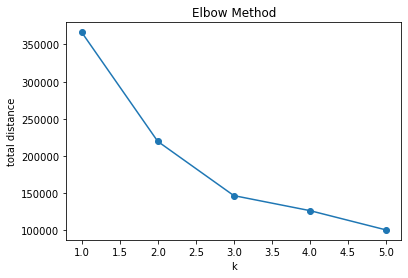

In [13]:
distances = []
cluster_all = []
K = range(1,6)
for k in K:
    _, _, w = kmeans(k,MAX_ITER,data)
    distances.append(w)

plt.plot(K, distances, marker='o')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

## Menyimpan hasil dataframe

In [14]:
df_clean.to_csv('./dataset/kendaraan_train_clean_clustering.csv', encoding='utf-8', index=False)